In [1]:
import numpy as np
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, CenteredNorm
import networkx as nx
import EoN
import igraph as ig
from PIL import Image

fear_threshold = 0.5

## Functions

In [2]:
# draw func

def draw_function(G):
    # Color by disease state
    disease_color_map = {'S': 'blue', 'E': 'orange', 'I': 'red', 'R': 'green'}
    node_colors = [disease_color_map[G.nodes[node]['disease_state']] for node in G.nodes()]
    
    # Shape by age class
    age_shape_map = {'A': 'o', 'E': 's', 'Y': '^'}  # o=circle, s=square, ^=triangle
    
    pos = nx.arf_layout(G)
    
    # Draw nodes by age class (different shapes)
    for age_class, shape in age_shape_map.items():
        # Get nodes with this age class
        nodes_in_class = [node for node in G.nodes() if G.nodes[node]['age_class'] == age_class]
        # Get their colors based on disease state
        colors_in_class = [disease_color_map[G.nodes[node]['disease_state']] for node in nodes_in_class]
        # get shade based on fear
        shade_in_fear = [0.4 if G.nodes[node]['fear'] > fear_threshold
                         else 1 for node in nodes_in_class]
        # Get their positions
        pos_in_class = {node: pos[node] for node in nodes_in_class}
        
        # Draw this subset
        nx.draw_networkx_nodes(G, pos=pos_in_class, nodelist=nodes_in_class,
                               node_color=colors_in_class, node_size=30, 
                               node_shape=shape, alpha=shade_in_fear)
    
    # Draw edges once
    nx.draw_networkx_edges(G, pos=pos, width=0.1, alpha=0.3)
    
    # Optional: add legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='S'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label='E'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='I'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='R'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=8, label='Adult'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', markersize=8, label='Elderly'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='gray', markersize=8, label='Young'),
    ]
    plt.legend(handles=legend_elements, loc='best')
    
    plt.axis('off')
    plt.show()

# function that counts how many nodes for each class
def node_counter(G):
    nodes_counter = {
        'A':0,
        'E':0,
        'Y':0
    }
    for i in range (len(G.nodes)):
        node = G.nodes[i]
        nodes_counter[node['age_class']]+=1
    return nodes_counter

# funct to save plot to
def save_plot(G,time,filepath,pos):
    # Color by disease state
    disease_color_map = {'S': 'blue', 'E': 'orange', 'I': 'red', 'R': 'green'}
    node_colors = [disease_color_map[G.nodes[node]['disease_state']] for node in G.nodes()]
    
    # Shape by age class
    age_shape_map = {'A': 'o', 'E': 's', 'Y': '^'}  # o=circle, s=square, ^=triangle
    
    
    
    # Draw nodes by age class (different shapes)
    for age_class, shape in age_shape_map.items():
        # Get nodes with this age class
        nodes_in_class = [node for node in G.nodes() if G.nodes[node]['age_class'] == age_class]
        # Get their colors based on disease state
        colors_in_class = [disease_color_map[G.nodes[node]['disease_state']] for node in nodes_in_class]
        # Get their positions
        pos_in_class = {node: pos[node] for node in nodes_in_class}
        # get shade based on fear
        shade_in_fear = [0.4 if G.nodes[node]['fear'] > fear_threshold
                         else 1 for node in nodes_in_class]
        
        # Draw this subset
        nx.draw_networkx_nodes(G, pos=pos_in_class, nodelist=nodes_in_class,
                               node_color=colors_in_class, node_size=30, 
                               node_shape=shape, alpha=shade_in_fear)
    
    # Draw edges once
    nx.draw_networkx_edges(G, pos=pos, width=0.1, alpha=0.3)
    
    # Optional: add legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='S'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label='E'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='I'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='R'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=8, label='Adult'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', markersize=8, label='Elderly'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='gray', markersize=8, label='Young'),
    ]
    #plt.legend(handles=legend_elements, loc='best')
    plt.title(f'Time = {time}')
    plt.axis('off')
    plt.savefig(filepath)
    plt.close()

## Contact data

/tmp/ipykernel_9936/280160516.py:7: DtypeWarning: Columns (6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  contacts = pd.read_csv(os.path.join(data_path, '2008_Mossong_POLYMOD_contact_common.csv'))


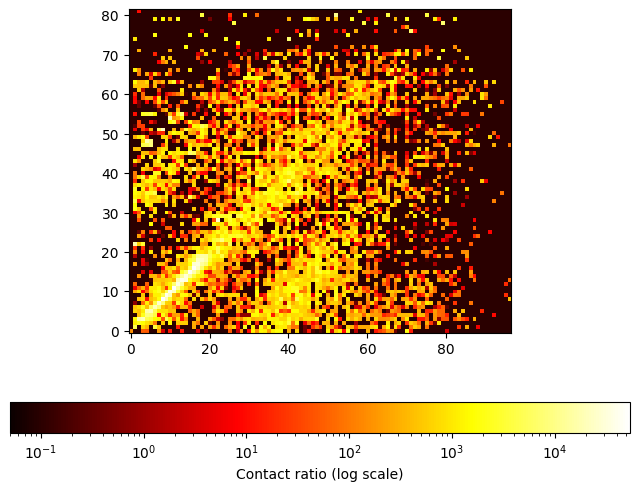

cont_cat,A,E,Y
part_cat,,,
A,0.528740,0.090234,0.381027
E,0.405755,0.404170,0.190074
Y,0.206117,0.022866,0.771018


In [3]:
# import of contact data
data_path = kagglehub.dataset_download("thedevastator/polymod-social-contacts-data")
files = os.listdir(data_path)
#print(f"Available files: {files}")

participants = pd.read_csv(os.path.join(data_path, "2008_Mossong_POLYMOD_participant_common.csv"))
contacts = pd.read_csv(os.path.join(data_path, '2008_Mossong_POLYMOD_contact_common.csv'))
nationalities = pd.read_csv(os.path.join(data_path, '2008_Mossong_POLYMOD_participant_extra.csv'))

# merge the dataframes to get desired data
data = pd.merge(participants,contacts, how = 'inner')[['part_id','part_age','cnt_age_exact','frequency_multi','duration_multi']]
data = pd.merge(data, nationalities, how = 'inner')[['part_id','part_age','cnt_age_exact','frequency_multi','duration_multi','participant_nationality']]
#print(f"Data has {np.shape(data)[0]} entries")
# drop NaN
data = data.dropna()
#print(f"Data has {np.shape(data)[0]} entries after dropping NA")

# select only italians
data = data[data['participant_nationality'] == 'IT']
#print(f"Data has {np.shape(data)[0]} entries after selecting only IT")

# define categories
data['part_cat'] = ['Y' if x <= 16.5 else(
                    'A' if x<= 65.5
                    else 'E') for x in data['part_age']]
data['cont_cat'] = ['Y' if x <= 18.5 else(
                    'A' if x<= 65.5
                    else 'E') for x in data['cnt_age_exact']]

# we shall now consider the columns frequency and duration
# duration categories: (1,2,3,4,5) are (less 5 min, 5 to 15 min, 15 min to 1h, 1-4 h, more than 4h)
# frequency categories: (1,2,3,4,5) are (daily, 1/2 times a week, 1/2 times a month, less than once a month, first time)
# we want the total time of the contacts. To achieve this we fix a time amount to compute, which is the number of minutes of contact in a full month
# we will substitue the rescaling factors in duration and frequency
data['frequency_multi'] = [30 if x == 1.0 else(
                            8 if x == 2.0 else(
                            1.5 if x == 3.0 else(
                            0.5 if x == 4.0 else(
                            1    
                            ))))for x in data['frequency_multi']]
data['duration_multi'] = [2.5 if x == 1.0 else(
                            10 if x == 2.0 else(
                            37.5 if x == 3.0 else(
                            120 if x == 4.0 else(
                            240    
                            ))))for x in data['duration_multi']]

# now compute the time (in minutes) in a month for the given contact
data['time'] = data['frequency_multi'] * data['duration_multi']

#plt.hist(data['time'])
#plt.show()

# Count contact time by exact age
contacts = data.groupby(['part_age','cnt_age_exact'], as_index=False)['time'].sum()
contacts_countings = data.groupby(['part_age','cnt_age_exact'], as_index=False)['time'].count()
contacts_matrix = contacts.pivot(index='part_age', columns='cnt_age_exact', values='time')
contacts_countings_matrix = contacts_countings.pivot(index = 'part_age', columns = 'cnt_age_exact', values = 'time')

# Count of participants by EXACT AGE (not categories!)
participant_counts = data.groupby('part_age')['part_id'].nunique()

#print("Contacts \n", contacts_matrix, "\n")
#print("Participant counts \n", participant_counts, "\n")

# Normalize
norm_contacts_matrix = contacts_matrix.div(participant_counts, axis=0)
#print("Normalized contact matrix:\n", norm_contacts_matrix, "\n")

# put zeros in places of NaN
norm_contacts_matrix[norm_contacts_matrix.isna()] = 0.1 # the log handles 0 poorly

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(norm_contacts_matrix, cmap='hot', norm=LogNorm())
plt.colorbar(im, ax=ax, label="Contact ratio (log scale)", orientation="horizontal")
ax.invert_yaxis()
plt.show()

# Count contact time by exact age
contacts = data.groupby(['part_cat','cont_cat'], as_index=False)['time'].sum()
contacts_matrix = contacts.pivot(index='part_cat', columns='cont_cat', values='time')

# Count of participants by EXACT AGE (not categories!)
participant_counts = data.groupby('part_cat')['part_id'].nunique()

#print("Contacts \n", contacts_matrix, "\n")
#print("Participant counts \n", participant_counts, "\n")

# Normalize
norm_contacts_matrix = contacts_matrix.div(participant_counts, axis=0)
#print("Normalized contact matrix:\n", norm_contacts_matrix, "\n")

# symmetrize the matrix and normalize rows to 1
norm_contacts_matrix = (norm_contacts_matrix + norm_contacts_matrix.T)/2
norm_contacts_matrix = norm_contacts_matrix.div(norm_contacts_matrix.sum(axis = 1), axis = 0)

norm_contacts_matrix

## Age data

In [4]:
# retrieve the data
pop_data = pd.read_csv("Resident population.csv")
total_IT_pop = pop_data['Total'].iloc[-1]
print(f"Total Italy population: {total_IT_pop} individuals")

# handle the last 2 lines 
pop_data.loc[100,'Age'] = 100
pop_data = pop_data.loc[:100,:]
pop_data_table = np.array(pop_data, dtype = float)
Y_pop = np.sum(pop_data_table[0:19,3])
A_pop = np.sum(pop_data_table[19:66,3])
E_pop = np.sum(pop_data_table[66:,3])
print(f"Total Y population: {Y_pop}, corresponding to {Y_pop/total_IT_pop*100}%")
print(f"Total A population: {A_pop}, corresponding to {A_pop/total_IT_pop*100}%")
print(f"Total E population: {E_pop}, corresponding to {E_pop/total_IT_pop*100}%")

Total Italy population: 58943464 individuals
Total Y population: 9356661.0, corresponding to 15.873958476549666%
Total A population: 35807880.0, corresponding to 60.74953450309605%
Total E population: 13778923.0, corresponding to 23.376507020354286%


## Network building

In [5]:
# initial populations of network in order A, E, Y 
N_tot = 100 # total
# N is list containing pop of A,E,Y initially
N = [int(A_pop/total_IT_pop*N_tot),int(E_pop/total_IT_pop*N_tot)]
N.append(N_tot-N[0]-N[1])
N


[60, 23, 17]

Removed 3713 edges
Edges remaining: 1237/4950


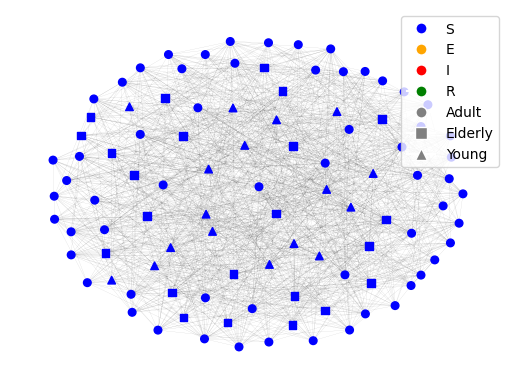

In [6]:
# creating nodes

# initial fear data distribution
fear_mu = [0.1,0.3,0.2]
fear_sigma = [0.03,0.07,0.03]

G = nx.Graph()
for i in range(N_tot):
    if (i < N[0]):
        age_class = 'A'
        fear = np.random.normal(fear_mu[0],fear_sigma[0])
    elif(i< N[1]+N[0]):
        age_class = 'E'
        fear = np.random.normal(fear_mu[1],fear_sigma[1])
    else:
        age_class = 'Y'       
        fear = np.random.normal(fear_mu[2],fear_sigma[2])
    # consistency check
    fear = min(fear,1)
    fear = max(fear,0)
    
    G.add_node(i, age_class = age_class, disease_state = 'S', fear = fear)

    
color_map = {'A': 'red', 'E': 'green', 'Y': 'yellow'}
node_colors = [color_map[G.nodes[node]['age_class']] for node in G.nodes()]

pos = nx.spring_layout(G,seed = 0)

# the initial setup is a FULLY CONNECTED
edges = []
for i in range(len(G.nodes)):
    for j in range(len(G.nodes)):
        if i!=j:
            edges.append((i,j))
G.add_edges_from(edges)

# Remove randomly some edges to make it realistic
total_edges = G.number_of_edges()
target_edges = int(total_edges * 0.25)  # Keep 25% of edges
edges_to_remove = total_edges - target_edges

# Get list of all edges and randomly sample which ones to remove
all_edges = list(G.edges())
edges_removed = np.random.choice(len(all_edges), size=edges_to_remove, replace=False)

for idx in edges_removed:
    u, v = all_edges[idx]
    G.remove_edge(u, v)

print(f"Removed {edges_to_remove} edges")
print(f"Edges remaining: {G.number_of_edges()}/{total_edges}")
draw_function(G)

In [7]:
# prob dict 
# average links to sample from by class
avg_links = {
    'A': 12,
    'E': 4,
    'Y': 20
}
# std for such average (sampling)
std_links = {
    'A': 3,
    'E': 1,
    'Y': 3
}

ages=np.array(['A','E','Y'])

# now we go with Barabasi Albert
final_size = 300  # Define the final network size

for i in range(N_tot, final_size):
    # Randomly assign age class to new node based on population distribution
    r = np.random.uniform(0,1)
    if r < N[0]/N_tot:
        age_class = 'A'
        fear = np.random.normal(fear_mu[0],fear_sigma[0])
    elif r < (N[0]+N[1])/N_tot:
        age_class = 'E'
        fear = np.random.normal(fear_mu[1],fear_sigma[1])
    else:
        age_class = 'Y'
        fear = np.random.normal(fear_mu[2],fear_sigma[2])
    
    # Add the new node with its age class
    G.add_node(i, age_class=age_class, disease_state = 'S', fear = fear)
    
    # Sample number of links from normal distribution based on age class
    n_links = max(1, int(np.random.normal(avg_links[age_class], std_links[age_class])))

    
    link=0
    connected_nodes=[]
    if age_class=='A':
        idx=0
    elif age_class=='E':
        idx=1
    else:
        idx=2
        
    while link < n_links:
        # select an age group based on contact probabilities
        target_age_probs = norm_contacts_matrix.iloc[idx]
        target_age = np.random.choice(ages, p=target_age_probs)
        
        # Get all nodes of the target age
        target_nodes = [node for node in G.nodes if G.nodes[node]['age_class'] == target_age]

        # degree of each potential target node for linking probability
        K = [G.degree(node) for node in target_nodes]
        K = np.array(K) # transform into numpy array
        total_degree = sum(K)

        link_prob = K/total_degree  ###linking probability for each target node

        while True:  ##check to see if I already connected 
            chosen_node = np.random.choice(target_nodes, p=link_prob)
            if chosen_node not in connected_nodes:
                linked_node = chosen_node
                connected_nodes.append(linked_node)
                break
        # Add edge
        G.add_edge(i, linked_node)
        link += 1

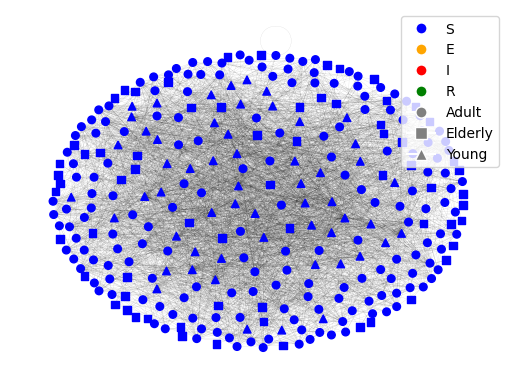

In [8]:
draw_function(G)

In [9]:
A = node_counter(G)['A']
E = node_counter(G)['E']
Y = node_counter(G)['Y']

tot = float(A)+float(E)+float(Y)
print(f"Fraction of A: {float(A)/tot}")
print(f"Fraction of E: {float(E)/tot}")
print(f"Fraction of Y: {float(Y)/tot}")

Fraction of A: 0.59
Fraction of E: 0.22333333333333333
Fraction of Y: 0.18666666666666668


# SEIR implementation


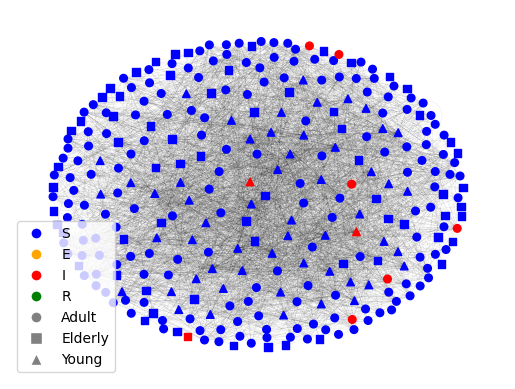

In [10]:
# some population will be infected at start
N = len(G.nodes)
frac = 0.03
I0 = int(N * frac)

# initial nodes infected are assigned here
I_indices = np.int64(np.random.uniform(0,1,9)*N)
for idx in I_indices:
    G.nodes[idx]['disease_state'] = 'I'

draw_function(G)

# rates 
beta = 0.1
gammaEI = 1./3
gammaIR = 1./7

In [11]:
# scaling times for E to I transition
gammaEI_resc = [1.,1.,0.8] # gammaEI rescaling factor based on age class
gammaIR_resc = [1.,1.5,0.75] # gammaIR rescaling factor based on age class

node_attribute_dict_EI = {
    node: gammaEI_resc[0] if G.nodes[node]['age_class'] == 'A' 
          else gammaEI_resc[1] if G.nodes[node]['age_class'] == 'E'
          else gammaEI_resc[2]
    for node in G.nodes()
}

# scaling times for I to R transition
node_attribute_dict_IR = {
    node: gammaIR_resc[0] if G.nodes[node]['age_class'] == 'A' 
          else gammaIR_resc[1] if G.nodes[node]['age_class'] == 'E'
          else gammaIR_resc[2]
    for node in G.nodes()
}

# scaling FEAR
edge_attribute_dict = {
    node: edge_r[0] if G.nodes[node]['fear'] < k1 
          else edge_r[1] if G.nodes[node]['fear'] < k2   # k2 > k1
          else edge_r[2]
    for node in G.nodes()
}


nx.set_node_attributes(G, values=node_attribute_dict_EI, name='expose2infect_weight')
nx.set_node_attributes(G, values=node_attribute_dict_IR, name='infect2recover_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict, name='transmission_weight')

NameError: name 'k1' is not defined

In [ ]:
# spontaneous transition graph
H = nx.DiGraph()
H.add_node('S')
H.add_edge('E', 'I', rate = gammaEI, weight_label='expose2infect_weight')
H.add_edge('I', 'R', rate = gammaIR, weight_label = 'infect2recover_weight')

# mediated transition graph
J = nx.DiGraph() 
J.add_edge(('I', 'S'), ('I', 'E'), rate = beta, weight_label='transmission_weight')   # rate = beta
# fear spread


In [ ]:
print("H edges:", H.edges(data=True))

# For neighbor-induced transitions (J)
print("J edges:", J.edges(data=True))

In [ ]:
return_statuses = ('S','E','I','R')
tmax = 100
# initial cond
IC = {node: G.nodes[node]['disease_state'] for node in G.nodes()}

t, S, E, I, R = EoN.Gillespie_simple_contagion(G,H,J,IC,return_statuses = return_statuses,tmax=tmax)


In [ ]:
plt.plot(t,S,label='S')
plt.plot(t,E,label='E')
plt.plot(t,I,label='I')
plt.plot(t,R,label='R')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Populations')
plt.show()


In [ ]:
full_data = EoN.Gillespie_simple_contagion(G, H, J, IC, 
                                           return_statuses=return_statuses, 
                                           tmax=tmax, 
                                           return_full_data=True)

In [ ]:
# times of snapshot
times = [0,1,2,3,4,5,8,10,12,15,18,22,26,30,34,40]


# produce plots
for time in times:
    status = full_data.get_statuses(nodelist=G.nodes(), time=time)
    L = nx.Graph()
    L.add_nodes_from(status)
    L.add_edges_from(G.edges)
    nx.set_node_attributes(L, values=status, name='disease_state')
    nx.set_node_attributes(L, values=G.nodes(data='age_class')[0], name='age_class')

    # select pos once for all plots
    if time == times[0]:
        pos = nx.arf_layout(G)
    
    # make a folder
    os.makedirs('frames', exist_ok=True)
    filepath = f'frames/network_status_time_{time}.png'
    save_plot(L,time,filepath,pos)

In [ ]:
# produce GIF
# make a folder
os.makedirs('gifs', exist_ok=True)
frames = []
for time in times:
    img = Image.open(f'frames/network_status_time_{time}.png')
    frames.append(img)
    
    frames[0].save(f'gifs/network_animation_from_{times[0]}_to_{times[-1]}.gif', 
                   save_all=True, 
                   append_images=frames[1:], 
                   duration=1000,  # milliseconds per frame
                   loop=0)
    
print("GIF saved as network_animation.gif")